In [85]:
import pandas as pd
import numpy as np


In [86]:
df = pd.read_csv('placement.csv')

In [87]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [88]:
df. shape 

(1000, 3)

In [89]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
en = LabelEncoder()

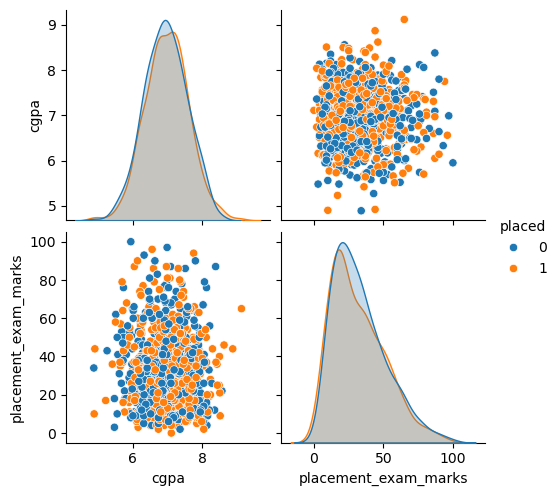

In [92]:
import seaborn as sns
sns.pairplot(df,hue='placed')

In [93]:
new_df = df[df['placed'] != 0][['cgpa','placement_exam_marks','placed']]

In [94]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
5,7.30,23.0,1


In [95]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [96]:
X.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


In [97]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: placed, dtype: int64

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [100]:
estimators =[('lr',clf1),('knn',clf2),('rf',clf3)]

In [101]:
for e in estimators:
    x=cross_val_score(e[1],X,y,cv=10,scoring='accuracy')
    print(e[0],np.round(np.mean(x),2))

lr 0.49
knn 0.49
rf 0.48


In [102]:
from sklearn.ensemble import VotingClassifier


HARD VOTING 

In [103]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.48


SOFT VOTING

In [104]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.49


WEIGHTED VOTING

In [105]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for in i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for in i=1,j=1,k=1 0.49
for in i=1,j=1,k=2 0.48
for in i=1,j=1,k=3 0.48
for in i=1,j=2,k=1 0.49
for in i=1,j=2,k=2 0.5
for in i=1,j=2,k=3 0.49
for in i=1,j=3,k=1 0.49
for in i=1,j=3,k=2 0.5
for in i=1,j=3,k=3 0.5
for in i=2,j=1,k=1 0.5
for in i=2,j=1,k=2 0.48
for in i=2,j=1,k=3 0.49
for in i=2,j=2,k=1 0.49
for in i=2,j=2,k=2 0.49
for in i=2,j=2,k=3 0.48
for in i=2,j=3,k=1 0.49
for in i=2,j=3,k=2 0.5
for in i=2,j=3,k=3 0.5
for in i=3,j=1,k=1 0.48
for in i=3,j=1,k=2 0.48
for in i=3,j=1,k=3 0.48
for in i=3,j=2,k=1 0.49
for in i=3,j=2,k=2 0.49
for in i=3,j=2,k=3 0.48
for in i=3,j=3,k=1 0.49
for in i=3,j=3,k=2 0.49
for in i=3,j=3,k=3 0.5


Classifiers of Same Algo

In [106]:
from sklearn.svm import SVC

In [107]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [108]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
